# Introduction to Numpy powered by oneAPI



# Exercises:

Do a page search for each **Exercise** in this notebook. Complete all  exercises. Code in cells above each exercise may give insight into a solid approach

In [18]:

import numpy as np
from math import log10 as lg10
import time
import matplotlib.pyplot as plt
import random
%matplotlib inline

#### Create a list of 1 million numbers

# Numpy Universal Functions (ufuncs)

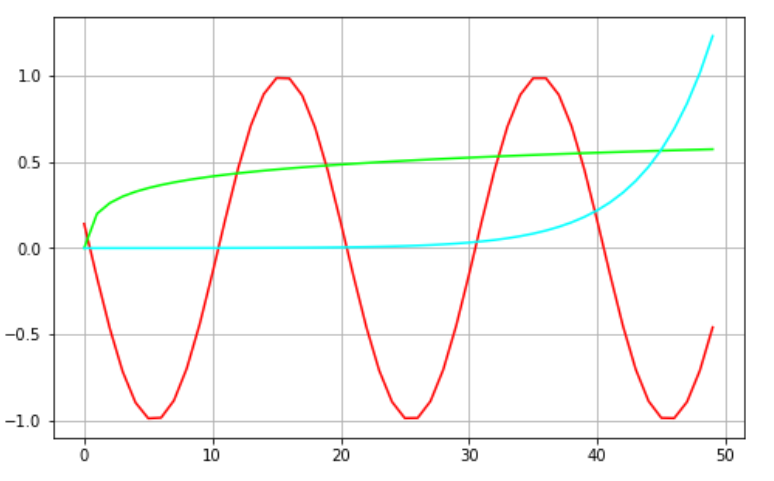


**Functions that operate element by element on whole arrays.**

A [universal function](https://numpy.org/doc/stable/reference/ufuncs.html) (or ufunc for short) is a function that operates on ndarrays in an element-by-element fashion, supporting array broadcasting, type casting, and several other standard features. That is, a ufunc is a “vectorized” wrapper for a function that takes a fixed number of specific inputs and produces a fixed number of specific outputs. For detailed information on universal functions, see Universal functions (ufunc) basics.

### Available ufuncs
There are currently more than [60 universal functions](https://numpy.org/doc/stable/reference/ufuncs.html)  defined in numpy on one or more types, covering a wide variety of operations. 
- **Methods for reductions:** reduce, accumulate, outer, ...
- **Math Functions:** log, exp, matmul, mod, multiply, add, ...
- **Trigonometric functions:** sin, cosine, tan, arcsin, hypot, ...
- **Bit-twiddling functions:** bitwise_and, bitwise_or, invert, left_shift, ...
- **Comparison functions:** greater, less_than, not_equal, logical_and ...
- **Floating functions:** isfinite, isinf, isnan, isnat, fabs, ... 

** Infix notation** (looks like simple math on arrays)
- **a + b**  Some of these ufuncs are called automatically on arrays when the relevant infix notation is used (e.g., add(a, b) is called internally when a + b is written and a or b is an ndarray).
- You may still want to use the ufunc call in order to use the optional output argument(s) to place the output(s) in an object (or objects) of your choice.


Many ufuncs also have built in reductions that can be applied

- One common operation used in AI frequently is maximum or minimum

- The Python function max() will find the maximum over a one-dimensional array, but it will do so using a slower sequence interface. 

- The reduce method of the maximum ufunc is much faster. 

- Also, the max() method will not give answers you might expect for arrays with greater than one dimension. 

- The reduce method of minimum also allows you to compute a total minimum over an array.

Here are simple examples for **log, exp cumulative sums and products**, etc:

In [19]:
# Muliple all elements in a vector together
print("multiply all elements of [2,3,5]" )
print(np.multiply.reduce([2,3,5]))

X = np.arange(8).reshape((2,2,2))
print("\nContents of X")
print(X)

print("\nSum all values of X")
print(np.sum(X))

print("\nAdd all values of X to itself")
print(np.add(X, X))

print("\nAdd all values of X by column")
print(np.add.reduce(X, axis = 0))

print("\nAdd all values of X by row")
print(np.add.reduce(X, axis = 1))


multiply all elements of [2,3,5]
30

Contents of X
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]

Sum all values of X
28

Add all values of X to itself
[[[ 0  2]
  [ 4  6]]

 [[ 8 10]
  [12 14]]]

Add all values of X by column
[[ 4  6]
 [ 8 10]]

Add all values of X by row
[[ 2  4]
 [10 12]]


### Naive Loop:

Apply **exp** to every element of array **a**

In [20]:
import math
L = 710
a = np.arange(1, L) # get sequence of numbers
collectExp1 = []
t1 = time.time()
timing = {}
for i in range(L-1):
    collectExp1.append(math.exp(a[i]))
t2 = time.time()
print("elapsed time: ", t2-t1)
timing['LoopExp'] = t2 - t1

elapsed time:  0.0005681514739990234


### Numpy Loop:

Apply **exp** to every element of array **a**

In [21]:
t1 = time.time()
collectExp2 = np.exp(a)
t2 = time.time()
print("elapsed time: ", t2-t1)
timing['NumpyExp'] = t2 - t1
print("acceleation: {:4.0f} X".format( timing['LoopExp']/timing['NumpyExp']))

elapsed time:  0.0002715587615966797
acceleation:    2 X


### Naive Loop:

Apply **log**  to every element of array **a**

In [22]:
import math
L = 1000000
a = np.arange(1, L) # get sequence of numbers
collectLogs1 = []
t1 = time.time()
timing = {}
for i in range(L-1):
    collectLogs1.append(math.log(a[i]))
t2 = time.time()
print("elapsed time: ", t2-t1)
timing['LoopLogs'] = t2 - t1

elapsed time:  0.29710936546325684


## Exercise:

Complete writing the equivalent Numpy fnctionality to the loop version above to compute **log10** for every element of array **a**
```
a = np.log10(a)
```

In [23]:
t1 = time.time()
### Complete the code below #####

a = np.log10(a)

#####################

t2 = time.time()
print("elapsed time: ", t2-t1)
timing['NumpyLog'] = t2 - t1
print("acceleation: {:4.0f} X".format( timing['LoopLogs']/timing['NumpyLog']))

elapsed time:  0.0033426284790039062
acceleation:   89 X


<BarContainer object of 2 artists>

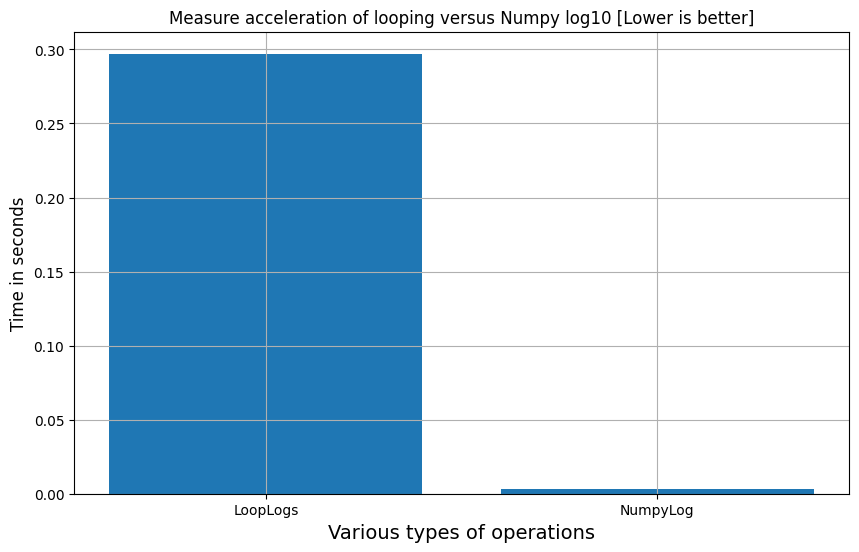

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Measure acceleration of looping versus Numpy log10 [Lower is better]",fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

### Cummulative sums and products

Numpy as functions to perform cummulative sums and prodcuts also

Examine the loop below to add up all numbers in an array and keep track of the running sums

In [25]:
L = 100000000
a = np.arange(L) # get sequence of numbers
timing = {}
t1 = time.time()
S = []
s = 0
for el in a:
    s += el
    S.append(s)
t2 = time.time()
timing['loop cumulative sum'] = t2 - t1
print("elapsed time: ", t2-t1)
print("a \n", a[:6])
print("S[:6]\n",S[:6]) 

elapsed time:  20.428670406341553
a 
 [0 1 2 3 4 5]
S[:6]
 [0, 1, 3, 6, 10, 15]


# Exercise:

Write a Numpy vectorized cell below to compute the running sum **S**, similar to loop above for input array **a**

- Hint:

```python
S = np.cumsum(a)
```


In [26]:

a = np.arange(L) # get sequence of numbers

t1 = time.time()
##### insert single line numpy code below ####

S = np.cumsum(a)

##############################################
t2 = time.time()
timing['numpy cumulative sum'] = t2 - t1
print("elapsed time: ", t2-t1)
print("a \n", a[:6])
print("S[:6]\n",S[:6]) 
print("acceleation: {:4.0f} X".format( timing['loop cumulative sum']/timing['numpy cumulative sum']))

elapsed time:  1.5247933864593506
a 
 [0 1 2 3 4 5]
S[:6]
 [ 0  1  3  6 10 15]
acceleation:   13 X


<BarContainer object of 2 artists>

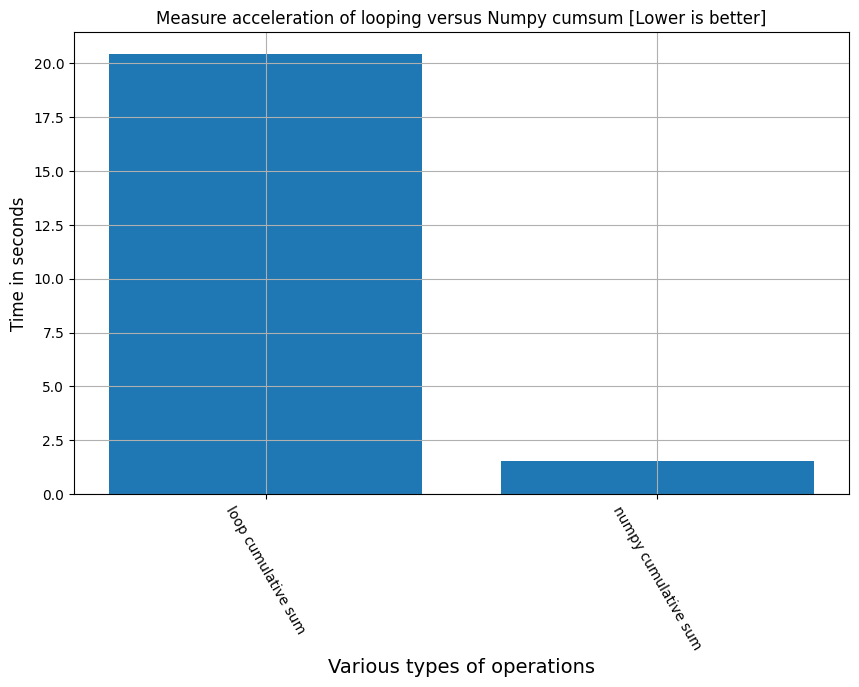

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Measure acceleration of looping versus Numpy cumsum [Lower is better]",fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.xticks(rotation = -60)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

Whatever loopy code you have - spend time looking for alternatives such as this. The acceleration can be exrardinary

# Check for Nan's and Inf's

In [28]:
import numpy as np
def generateNansInfs(a):
    a2 = 1/(a-4)/(a-17)/(a-23)
    a2[12] = 1e500 - 1e500
    a2[6] = 1e500 - 1e500
    return a2
a = np.linspace(1, 25, 25)
b = generateNansInfs(a)

/home/u78349/tmp/ipykernel_1346123/2529706767.py:3: RuntimeWarning: divide by zero encountered in true_divide
  a2 = 1/(a-4)/(a-17)/(a-23)


In [29]:
print("nan's")
print(np.isnan(b))

nan's
[False False False False False False  True False False False False False
  True False False False False False False False False False False False
 False]


In [30]:
print("inf's")
print(np.isinf(b))

inf's
[False False False  True False False False False False False False False
 False False False False  True False False False False False  True False
 False]


In [31]:
print("Done")

Done
